In [18]:
pip install nibabel opencv-python tabulate


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
%reset

# Dataset Preparation

In [23]:
from ct_image_processing import ImageProcessing
from ct_visualizer import CTVisualizer

root = 'ct_images/' #'/Users/yigal/CT-Datasets/'

liver_images_path = f"{root}Task03_Liver/imagesTr/"
liver_labels_path = f"{root}Task03_Liver/labelsTr/"

number_of_ct_patients = 131

imgProcessor = ImageProcessing()

ctVisualizer = CTVisualizer()

X_all = []
Y_all = []


In [25]:
# Create Dataset
print(f"Start Building CT Dataset with {number_of_ct_patients} patients")

X_all, Y_all, patient_ids, total = imgProcessor.create_dataset(liver_images_path,
                                                        liver_labels_path,
                                                        binary=True,
                                                        target_size=(256, 256),
                                                        hu_window=(30, 180),
                                                        number_of_ct_patients=number_of_ct_patients,
                                                        labeled_only=True)

print(total)
print('Len (X, Y, Patients):', len(X_all), len(Y_all), len(patient_ids))
print(f'Sample Patient Shapes ({patient_ids[2]}): X[2] Y[2]:', X_all[2].shape, Y_all[2].shape)

Start Building CT Dataset with 131 patients
liver_0 slices: 29 / 75
liver_1 slices: 29 / 123
liver_2 slices: 139 / 517
liver_3 slices: 169 / 534
liver_4 slices: 250 / 841
liver_5 slices: 176 / 537
liver_6 slices: 186 / 518
liver_7 slices: 177 / 541
liver_8 slices: 179 / 541
liver_9 slices: 173 / 549
liver_10 slices: 181 / 501
liver_11 slices: 167 / 466
liver_12 slices: 189 / 455
liver_13 slices: 142 / 605
liver_14 slices: 139 / 588
liver_15 slices: 133 / 565
liver_16 slices: 187 / 689
liver_17 slices: 198 / 826
liver_18 slices: 189 / 845
liver_19 slices: 188 / 547
liver_20 slices: 194 / 574
liver_21 slices: 175 / 437
liver_22 slices: 46 / 247
liver_23 slices: 116 / 391
liver_24 slices: 118 / 276
liver_25 slices: 232 / 601
liver_26 slices: 192 / 668
liver_27 slices: 229 / 861
liver_28 slices: 98 / 129
liver_29 slices: 114 / 172
liver_30 slices: 123 / 200
liver_31 slices: 67 / 91
liver_32 slices: 119 / 139
liver_33 slices: 96 / 135
liver_34 slices: 98 / 151
liver_35 slices: 116 / 124
liv

Sample 0: liver_0.nii.gz


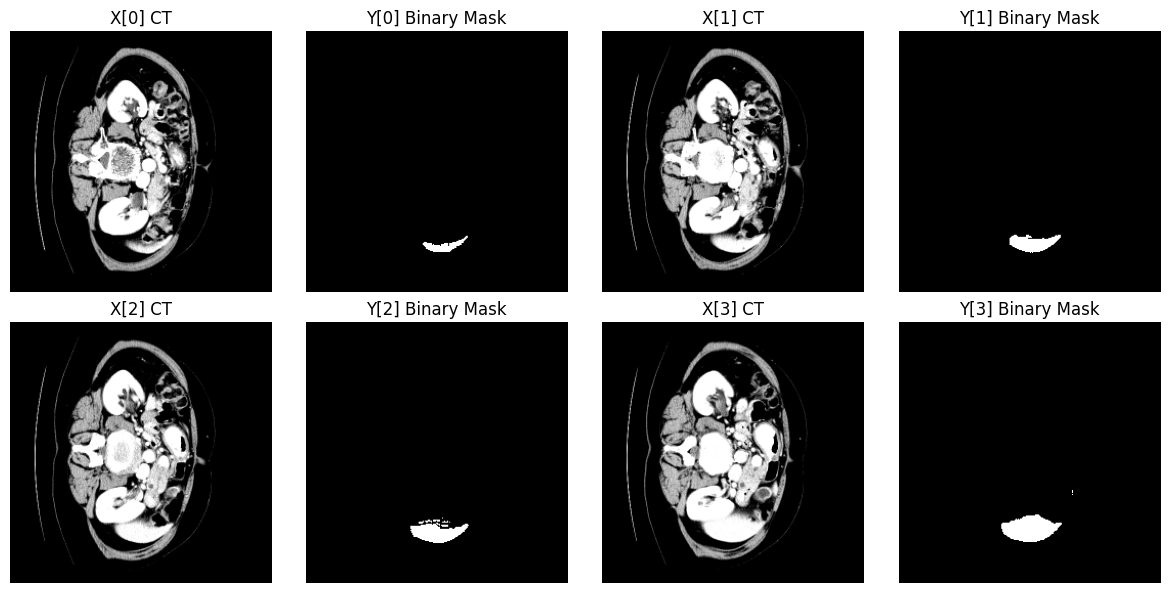

Sample 1: liver_1.nii.gz


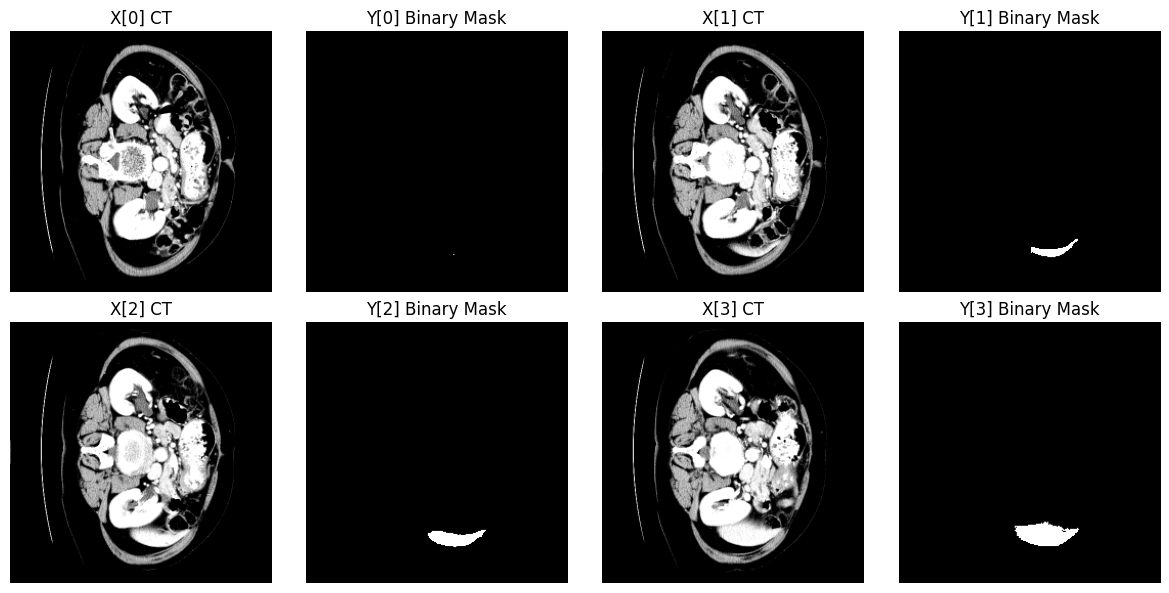

In [26]:
# Show Samples
number_of_samples = 2
number_of_slices = 4
for i in range(number_of_samples):
    print(f"Sample {i}: liver_{i}.nii.gz")
    ctVisualizer.display_XY_samples_v2(X_all[i], Y_all[i], max_slices=number_of_slices)

In [30]:
# Save Dataset

if (len(X_all) > 0 and len(Y_all) > 0):
    imgProcessor.save_dataset(X_all, Y_all, patient_ids, f"datasets/liver_dataset_{number_of_ct_patients}.npz")
else:
    print('X_all || Y_all are empty')

In [31]:
# Load Dataset

X_all, Y_all, patient_ids = imgProcessor.load_dataset(f"datasets/liver_dataset_{number_of_ct_patients}.npz")

print(len(X_all), len(Y_all), len(patient_ids))

131 131 131


# Dataset Splitting - Training | Validation | Test --> Disabled for now

In [ ]:
# Disabled since we want to run t-sne on all dataset to find the indecisive samples

# Splitting the data

# from sklearn.model_selection import train_test_split
# import numpy as np
#
# # Split patients into train, val, test (by index)
# train_idx, test_idx = train_test_split(range(number_of_ct_patients), test_size=0.2, random_state=42)
# train_idx, val_idx = train_test_split(train_idx, test_size=0.2, random_state=42)
#
# # Combine slices from selected patients
# X_train = np.concatenate([X_all[i] for i in train_idx])
# Y_train = np.concatenate([Y_all[i] for i in train_idx])
#
# X_val = np.concatenate([X_all[i] for i in val_idx])
# Y_val = np.concatenate([Y_all[i] for i in val_idx])
#
# X_test = np.concatenate([X_all[i] for i in test_idx])
# Y_test = np.concatenate([Y_all[i] for i in test_idx])
#
# print("Splits by patients:")
#
# print(len(train_idx), len(val_idx), len(test_idx))
#
# print(X_train.shape, X_val.shape, X_test.shape)

# Supervised Learning Training

In [ ]:
from UNet_Model.unet_segmentation_pipeline import UNetSegmentationPipeline

print(X_train.shape, X_val.shape, X_test.shape)

# Build and train model
pipeline = UNetSegmentationPipeline(input_shape=(256, 256, 1))

pipeline.summary()

In [ ]:

epochs = 8
history = pipeline.fit(X_train, Y_train, X_val, Y_val, epochs=epochs, batch_size=16, verbose=2)